# Tarea 2

*Miguel Raz y Claudio Pierard*

1) Consideren la función

\begin{equation}
z_{n+1} = z_n^2 + c, 
\end{equation}

con `c = 0.12256484161600012 - 0.74486407104im`. Definan una malla de valores iniciales $z_0$ en el intervalo $[-1,1]\times [-1,1]$ (parte real $\times$ parte imaginaria).

- ¿Cuantos valores finitos distintos (en el intervalo $[-1,1]\times [-1,1]$) se pueden obtener después de un gran número de iteraciones?

- Usando un color distinto para cada uno, grafiquen en el plano $\textrm{Re}(z) - \textrm{Im}(z)$ el conjunto obtenido.

2) Usando la función `compute_roots` vista en clase, o en alguna variación propuesta por ustedes, definan (en Julia) el mapeo

\begin{equation}
x_{n+1} = B(x_{n}) = 2x_n \mod 1.
\end{equation}

- Obtengas los puntos fijos de este mapeo numéricamente. Los puntos fijos del mapeo son aquéllos que se mapean en si mismos, es decir, $x_{n} = B(x_{n})$. Este cálculo se puede hacer a mano, lo que debe usarse para comprobar que la implementación numérica funciona bien.

- Pensando en que la estabilidad de un punto fijo es el comportamiento que se observa de los iterados (a priori un número infinito) al considerar pequeñas desviaciones del punto fijo, ¿cuál es la estabilidad de los puntos fijos que se obtiene *numéricamente*, digamos, después de 100 iteraciones? ¿Pueden encontrar una explicación analítica de la observación numérica?

*Hint: Sean imaginos y no se conformen*

----------

#### Pregunta 1
Primero se hace la malla de condiciones iniciales para números complejos:

In [77]:
using PyPlot, LaTeXStrings #Todavía usamos PyPlot, ya que el heatplot en Plots no está muy bien.

In [12]:
complex( zeros(4,4))

4x4 Array{Complex{Float64},2}:
 0.0+0.0im  0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im  0.0+0.0im

In [128]:
"""
initial_conditions(rango_re, rango_im)

Esta función crea una matriz de números complejos en el rango especificado (rango_re x rango_im).

"""


function initial_conditions(rango_re, rango_im)
    
    imaginarios = collect(rango_im)
    reales = collect(rango_re)
    
    Z_initial = complex( zeros( length(rango_re), length(rango_im) ))
    
    for j in 1 : length(rango_im)
        for i in 1 : length(rango_re)
            
            Z_initial[i,j] = complex(reales[i], imaginarios[j])
            
        end
    end
    
    Z_initial
    
end

initial_conditions (generic function with 2 methods)

In [136]:
"""
    iterator(f, X0, n)

Esta función itera n veces todos los valores del arreglo X0 con una función f.
"""
function iterator(f, X0, n)
    
    for i in 1:length(X0[:,1])
        for j in 1:length(X0[1,:])
            for t in 1:n

                X0[i,j] = f(X0[i,j])
                

            end
        end
    end

    X0
    
end

iterator (generic function with 1 method)

Ahora definimos la función que se va a iterar:

$$ f(z) = z^2 -0.123 + 0.745i$$

In [115]:
f(z) = z^2 + complex(-0.123, 0.745) #Se define la función con el c actualizado.

f (generic function with 1 method)

In [160]:
Z0 = initial_conditions(-1:1/2^6:1, -1:1/2^8:1) #Se crean una malla con condiciones iniciales.

129x513 Array{Complex{Float64},2}:
      -1.0-1.0im       -1.0-0.996094im  …       -1.0+1.0im
 -0.984375-1.0im  -0.984375-0.996094im     -0.984375+1.0im
  -0.96875-1.0im   -0.96875-0.996094im      -0.96875+1.0im
 -0.953125-1.0im  -0.953125-0.996094im     -0.953125+1.0im
   -0.9375-1.0im    -0.9375-0.996094im       -0.9375+1.0im
 -0.921875-1.0im  -0.921875-0.996094im  …  -0.921875+1.0im
  -0.90625-1.0im   -0.90625-0.996094im      -0.90625+1.0im
 -0.890625-1.0im  -0.890625-0.996094im     -0.890625+1.0im
    -0.875-1.0im     -0.875-0.996094im        -0.875+1.0im
 -0.859375-1.0im  -0.859375-0.996094im     -0.859375+1.0im
  -0.84375-1.0im   -0.84375-0.996094im  …   -0.84375+1.0im
 -0.828125-1.0im  -0.828125-0.996094im     -0.828125+1.0im
   -0.8125-1.0im    -0.8125-0.996094im       -0.8125+1.0im
          ⋮                             ⋱                 
  0.828125-1.0im   0.828125-0.996094im      0.828125+1.0im
   0.84375-1.0im    0.84375-0.996094im       0.84375+1.0im
  0.859375-1.0im   0.

In [161]:
z2 = iterator(f, Z0, 10000) #Lo iteramos 10000 veces

129x513 Array{Complex{Float64},2}:
 NaN+NaN*im  NaN+NaN*im  NaN+NaN*im  …  NaN+NaN*im  NaN+NaN*im  NaN+NaN*im
 NaN+NaN*im  NaN+NaN*im  NaN+NaN*im     NaN+NaN*im  NaN+NaN*im  NaN+NaN*im
 NaN+NaN*im  NaN+NaN*im  NaN+NaN*im     NaN+NaN*im  NaN+NaN*im  NaN+NaN*im
 NaN+NaN*im  NaN+NaN*im  NaN+NaN*im     NaN+NaN*im  NaN+NaN*im  NaN+NaN*im
 NaN+NaN*im  NaN+NaN*im  NaN+NaN*im     NaN+NaN*im  NaN+NaN*im  NaN+NaN*im
 NaN+NaN*im  NaN+NaN*im  NaN+NaN*im  …  NaN+NaN*im  NaN+NaN*im  NaN+NaN*im
 NaN+NaN*im  NaN+NaN*im  NaN+NaN*im     NaN+NaN*im  NaN+NaN*im  NaN+NaN*im
 NaN+NaN*im  NaN+NaN*im  NaN+NaN*im     NaN+NaN*im  NaN+NaN*im  NaN+NaN*im
 NaN+NaN*im  NaN+NaN*im  NaN+NaN*im     NaN+NaN*im  NaN+NaN*im  NaN+NaN*im
 NaN+NaN*im  NaN+NaN*im  NaN+NaN*im     NaN+NaN*im  NaN+NaN*im  NaN+NaN*im
 NaN+NaN*im  NaN+NaN*im  NaN+NaN*im  …  NaN+NaN*im  NaN+NaN*im  NaN+NaN*im
 NaN+NaN*im  NaN+NaN*im  NaN+NaN*im     NaN+NaN*im  NaN+NaN*im  NaN+NaN*im
 NaN+NaN*im  NaN+NaN*im  NaN+NaN*im     NaN+NaN*im  NaN+NaN*im  N

In [162]:
entradas = length(z2) #Calculo de cantidad de valores de la malla que divergen.

valores_divergen = 0

for i in 1:length(z2)
    
    if isnan(z2[i]) == true
        
        valores_divergen += 1
        
    end
    
end

porcentaje = valores_divergen * 100 / entradas

69.47731084817988

$69.48 \%$ de los valores de la malla divergen, cuando se hacen 10000 iteraciones.

**Observaciones: ** Casi todos los valores de la función divergen demasiado rápido, por lo que no tiene sentido plotear estos valores. Se necesita otro enfoque.

Usando un artículo del portal [Linux Voice](https://www.linuxvoice.com/issues/010/julia.pdf), nos pudimos orientar en como poder graficar las iteracciones de la función dada en el ejercicio.

In [137]:
"""
    julia_fractal(f, X0, n, k)
    OUT: matriz_iteraciones

La función julia_fractal itera de `1` hasta `n`, una función `f` dada. Sin embargo, lo que hace esta función es
marcar hasta que número de iteración la función diverge, para una condición inicial. El parámentro k es el que 
establece este límite, los números cuya norma sea mayor a `k`, divergen. 
"""

function julia_fractal(f, X0, n, k)
    
    num_iteraciones = zeros(length(X0[:,1]), length(X0[1,:])) #Arreglo de mismas dimensiones que el arreglo complejo                                                              #jo 
    #X0, pero este es entero.
    
    for i in 1:length(X0[:,1]) #Recorre cada elemento de la matriz de condiciones iniciales.
        for j in 1:length(X0[1,:])
            for t in 1:n     # número de iteraciones

                X0[i,j] = f(X0[i,j]) #itera la función 
                num_iteraciones[i,j] = t # por cada iteración, se actaliza el valor de las iteraciones.
                
                if abs(X0[i,j]) >= k  #si una entrada de X0 es mayor a k, entonces esta diverge. El k mínimo para que
                    #salga algo es 4.
                    
                    break
                    
                end 

            end
        end
    end
   
    
    num_iteraciones
    
end

julia_fractal (generic function with 2 methods)

In [171]:
Z0 = initial_conditions(-1:1/2^8:1, -1:1/2^8:1)
Zf = julia_fractal(f, Z0, 100, 4) #el valor de k es 4, y el número de iteraciones es 100.

513x513 Array{Float64,2}:
 2.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0  …  4.0  4.0  4.0  4.0  4.0  4.0  4.0
 2.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0     4.0  4.0  4.0  4.0  4.0  4.0  4.0
 2.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0     4.0  4.0  4.0  4.0  4.0  4.0  4.0
 2.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0     4.0  4.0  4.0  4.0  4.0  4.0  4.0
 2.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0     4.0  4.0  4.0  4.0  4.0  4.0  4.0
 2.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0  …  4.0  4.0  4.0  4.0  4.0  4.0  4.0
 2.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0     4.0  4.0  4.0  4.0  4.0  4.0  4.0
 2.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0     4.0  4.0  4.0  4.0  4.0  4.0  4.0
 2.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0     4.0  4.0  4.0  4.0  4.0  4.0  4.0
 2.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0     4.0  4.0  4.0  4.0  4.0  4.0  4.0
 2.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0  …  4.0  4.0  4.0  4.0  4.0  4.0  4.0
 2.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0     4.0  4.0  4.0  4.0  4.0  4.0  4.0
 2.0  2.0  2.0  2.0  2.0  2.0  2.0  2.

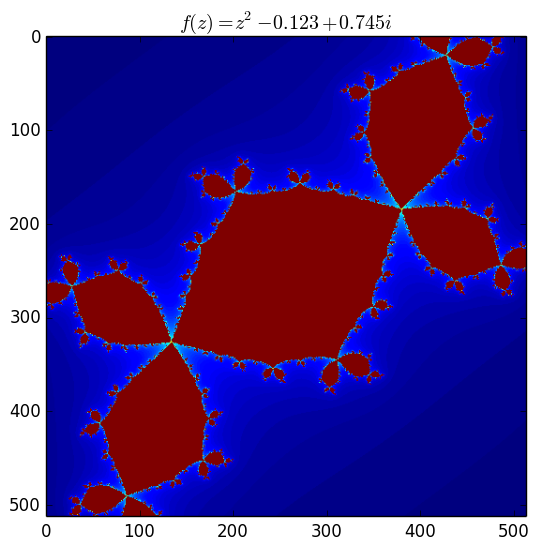

PyObject <matplotlib.text.Text object at 0x3bf3039d0>

In [172]:
imshow(Zf)
title(L"f(z) = z^2 -0.123 +0.745i ")

**Obs:** La clave está en graficar el número de iteraciones para una condición inicial antes de que diverja.

*Sólo para ver que era lo que estaba mal con la función con c distinto, que cambió Luis:*

$$g(z) = z^2 + 0.12256484161600012 -0.74486407104i$$

In [153]:
g(z) = z^2 + complex(0.12256484161600012, -0.74486407104) #función anterior a la actalización.

g (generic function with 1 method)

In [154]:
x0 = initial_conditions(-1:1/2^8:1, -1:1/2^8:1)
x_frac = julia_fractal(g, x0, 1000, 80)

513x513 Array{Float64,2}:
 6.0  6.0   6.0   6.0   6.0   6.0   6.0  …   4.0   4.0   4.0   4.0  4.0  4.0
 6.0  6.0   6.0   6.0   6.0   6.0   7.0      4.0   4.0   4.0   4.0  4.0  4.0
 6.0  6.0   6.0   6.0   7.0   7.0   7.0      4.0   4.0   4.0   4.0  4.0  4.0
 6.0  6.0   7.0   7.0   7.0   7.0   7.0      4.0   4.0   4.0   4.0  4.0  4.0
 7.0  7.0   7.0   7.0   7.0   7.0   7.0      4.0   4.0   4.0   4.0  4.0  4.0
 7.0  7.0   7.0   7.0   7.0   7.0   7.0  …   4.0   4.0   4.0   4.0  4.0  4.0
 7.0  7.0   7.0   7.0   7.0   7.0   7.0      4.0   4.0   4.0   4.0  4.0  4.0
 7.0  7.0   7.0   7.0   7.0   7.0   7.0      4.0   4.0   4.0   4.0  4.0  4.0
 7.0  7.0   7.0   8.0   8.0   8.0   8.0      4.0   4.0   4.0   4.0  4.0  4.0
 7.0  8.0   8.0   8.0   8.0   8.0   8.0      4.0   4.0   4.0   4.0  4.0  4.0
 8.0  8.0   8.0   9.0  10.0  10.0   9.0  …   4.0   4.0   4.0   4.0  4.0  4.0
 8.0  8.0  10.0  11.0  21.0  11.0   9.0      4.0   4.0   4.0   4.0  4.0  4.0
 8.0  9.0  11.0  31.0  18.0  12.0  10.0      4.0  

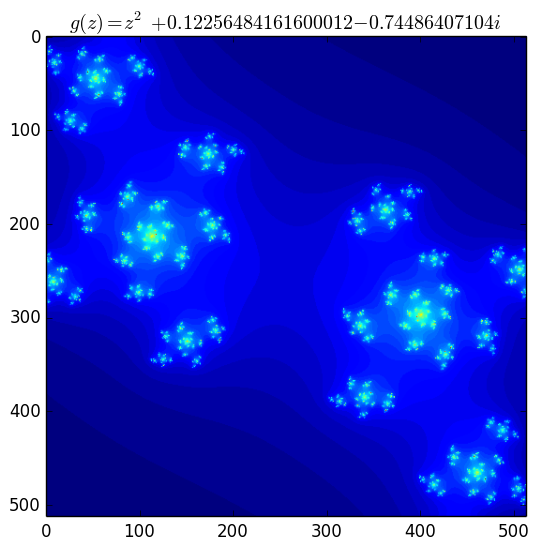

PyObject <matplotlib.text.Text object at 0x3bb0dd310>

In [155]:
imshow(x_frac)
title(L"g(z) = z^2 + 0.12256484161600012 -0.74486407104i")

---------

#### Pregunta 2

In [177]:
function compute_roots(f, f´, range)
    initial_conditions = range
    roots = similar(initial_conditions)

    for (j, x_0) in enumerate(initial_conditions)
        x = x_0

        # 100 iterations of Newton's method
        for i in 1:100
            x = x - f(x) / f´(x)
        end

        roots[j] = x
    end
    
    roots
end

compute_roots (generic function with 1 method)

In [178]:
#g(x) = 2x%1 #Mapeo
g(x) = 2*x < 1 ? 2*x : 2*x-1
dg(x) = 2

dg (generic function with 1 method)

Definiendo un arreglo de condiciones iniciales:

In [179]:
mirango = -1:0.01:1
groots = compute_roots(g, dg, -1:0.01:1)
plot(mirango, groots)
ylim(-1.1, 1.1)
xlim(-1.1, 1.1)

xlabel("Condiciones iniciales")
ylabel("Raíces de función g(x)")
title("Cálculo de puntos fijos de la función L$g(x)$")

LoadError: LoadError: syntax: invalid interpolation syntax: "$""
while loading In[179], in expression starting on line 9

**Observaciones:** Para valores iniciales en el intervalo $[-1,1]$, los puntos fijos son $-0.5$, $0$ y $0.5$.

In [13]:
function mapeos(f, X0, n)
    
    x_solution = zeros(eltype(X0), length(X0), n)   #Estoy considerando a X0 como un array de 1 x n dimensiones.
    x_solution[:, 1] = X0
    
    for t in 2:n
        for i in 1:length(X0)
        
            x_solution[i,t] = f(x_solution[i, t-1])
            
        end
        
    end
    
    x_solution
    
end

mapeos (generic function with 1 method)

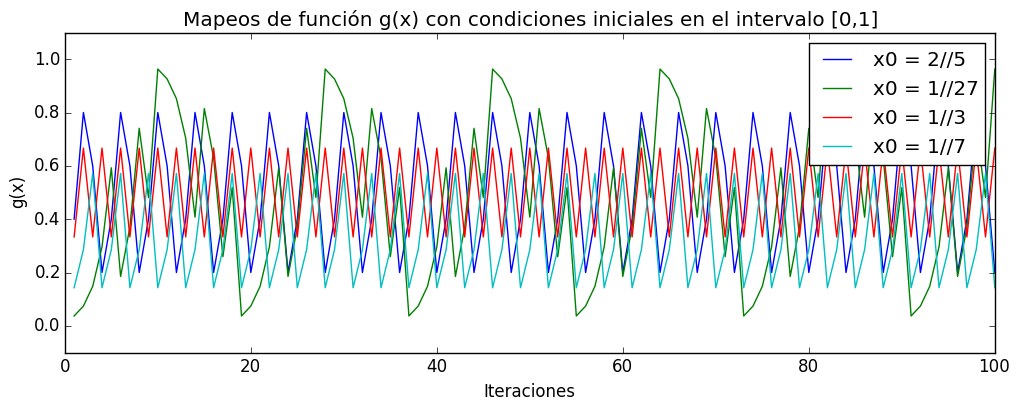

PyObject <matplotlib.legend.Legend object at 0x7f8498ea52d0>

In [23]:
t = collect(1:100)
#X0 = collect(0.1:0.1:1)
X0=[2//5, 1//27, 1//3, 1//7]
Xf = mapeos(g, X0, 100)

figure(figsize=(12,4))

for i in 1:length(Xf[:,1])
    etiqueta = Xf[i,1]
    plot(t, Xf[i,:]', label=("x0 = $etiqueta"))
    #plot(t, Xf[i,:]', "-.")
    
end

#plot(t, Xf[5,:]', label=("x0 = 0.5"))
#plot(Xf[:,:], label=("x0 = 0.5"))

ylim(-0.1, 1.1)
xlabel("Iteraciones")
ylabel("g(x)")
title("Mapeos de función g(x) con condiciones iniciales en el intervalo [0,1]")
legend()

In [15]:
Xf #Comentario de Luis: Checar que con números racionales como condiciones iniciales, las orbitas no converjen a cero 
#cuando n>64.

2x100 Array{Rational{Int64},2}:
 2//5   4//5   3//5   1//5    2//5   4//5   …   2//5    4//5    3//5    1//5 
 1//27  2//27  4//27  8//27  16//27  5//27     10//27  20//27  13//27  26//27